### Time Series Feature Extraction helps in:

- ``Classification Problems``: For identifying patterns or categorizing data, e.g., activity recognition (walking vs. running) or fault detection in machinery.
- ``Clustering``: Grouping similar time series based on extracted features like trend, seasonality, or periodicity.
- ``Anomaly Detection``: Detecting outliers by comparing extracted features like mean or variance with expected ranges.
- ``Regression``: Predicting continuous outcomes using time-series-derived features as inputs.
- ``Dimensionality Reduction``: Summarizing complex time series into meaningful features for simpler downstream analysis.

### `Import Libraries`

In [2]:
import pandas as pd
import numpy as np 
import sys
import os
import itertools
import datetime
import scipy.stats as sp 
import pymannkendall as mk
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
import warnings 
from scipy.signal import find_peaks
from IPython.display import display, HTML 

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### `Sample Data : Category[A]`

Length of data :  24
[1, 3, 6, 2, 5, 12, 14, 6, 5, 3, 2, 1, 1, 3, 6, 2, 5, 12, 14, 6, 5, 3, 2, 1]


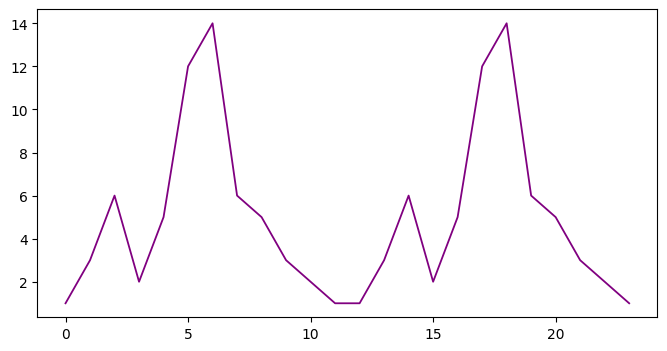

In [5]:
##### Sample Data 
data = pd.Series([1,3,6,2,5,12,14,6,5,3,2,1,
                1,3,6,2,5,12,14,6,5,3,2,1]
                )
print("Length of data : ", len(data))
print(data.tolist())

##### Plotting
# plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
data.plot(ax=axes, linestyle="-", linewidth=1.3, color="purple", label="Value")
# plt.legend()
plt.show()

### `Sample Data With Datetime`

In [6]:
# starttime = datetime.datetime.strptime("2022-01-01 00:00:00.123000", "%Y-%m-%d %H:%M:%S.%f")
# endtime = datetime.datetime.strptime("2022-01-06 00:00:00.123000", "%Y-%m-%d %H:%M:%S.%f")

starttime = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d")
endtime = datetime.datetime.strptime("2022-01-06", "%Y-%m-%d")

time_diff = endtime - starttime 
print(f"Starttime : {starttime}")
print(f"Endtime : {endtime}")
print(f"Time Diff : {time_diff}")

# time_diff_secs = time_diff.seconds
time_diff_secs = int(time_diff.total_seconds())
print(f"Time Diff Secs : {time_diff_secs}")

# time_diff_milli_secs = time_diff_secs * 24
# datetime_list = [starttime + datetime.datetime.timedelta(milliseconds=1*x) for x in range(0, time_diff_milli_secs)]
# datetime_list = [starttime + datetime.timedelta(milliseconds=1*x) for x in range(0, 24)] # Sample data values
datetime_list = [starttime + datetime.timedelta(days=1*x) for x in range(0, 24)] # Sample data values
print("Datetime List : ")
print(datetime_list)

Starttime : 2022-01-01 00:00:00
Endtime : 2022-01-06 00:00:00
Time Diff : 5 days, 0:00:00
Time Diff Secs : 432000
Datetime List : 
[datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 1, 2, 0, 0), datetime.datetime(2022, 1, 3, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 5, 0, 0), datetime.datetime(2022, 1, 6, 0, 0), datetime.datetime(2022, 1, 7, 0, 0), datetime.datetime(2022, 1, 8, 0, 0), datetime.datetime(2022, 1, 9, 0, 0), datetime.datetime(2022, 1, 10, 0, 0), datetime.datetime(2022, 1, 11, 0, 0), datetime.datetime(2022, 1, 12, 0, 0), datetime.datetime(2022, 1, 13, 0, 0), datetime.datetime(2022, 1, 14, 0, 0), datetime.datetime(2022, 1, 15, 0, 0), datetime.datetime(2022, 1, 16, 0, 0), datetime.datetime(2022, 1, 17, 0, 0), datetime.datetime(2022, 1, 18, 0, 0), datetime.datetime(2022, 1, 19, 0, 0), datetime.datetime(2022, 1, 20, 0, 0), datetime.datetime(2022, 1, 21, 0, 0), datetime.datetime(2022, 1, 22, 0, 0), datetime.datetime(2022, 1, 23, 0, 0), dat

### `Final Data`

In [7]:
df = pd.DataFrame({"Datetime":datetime_list,
                    "Values":data
                    })
df.index = range(len(df))
df["ID"] = df.index
df["Category"] = "A"

print(df.info())
print(df.head(2))
print(df.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  24 non-null     datetime64[ns]
 1   Values    24 non-null     int64         
 2   ID        24 non-null     int64         
 3   Category  24 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 900.0+ bytes
None
    Datetime  Values  ID Category
0 2022-01-01       1   0        A
1 2022-01-02       3   1        A
     Datetime  Values  ID Category
22 2022-01-23       2  22        A
23 2022-01-24       1  23        A


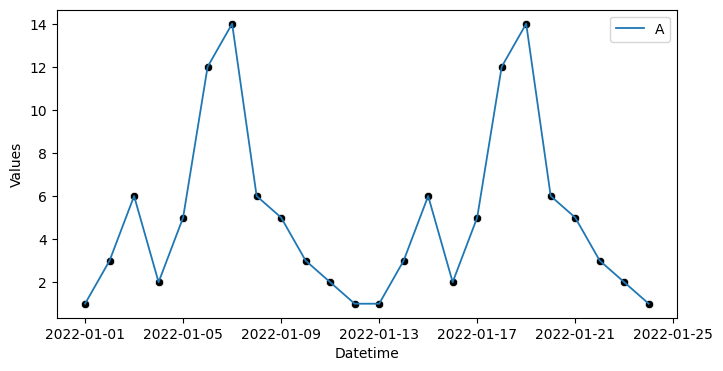

In [9]:
##### Plotting
# plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
# df.plot(x="Datetime", y="Values", 
#         ax=axes, linestyle="-", 
#         linewidth=1.3, color="purple"
#         )
sns.lineplot(x="Datetime", y="Values", data=df, ax=axes, linestyle="-", linewidth=1.3, color="purple", hue="Category")
sns.scatterplot(x="Datetime", y="Values", data=df, ax=axes, color="black")
# plt.legend()
plt.show()

### `Features Extraction`

In [10]:
print(df.head(5))
print(df.tail(5))

    Datetime  Values  ID Category
0 2022-01-01       1   0        A
1 2022-01-02       3   1        A
2 2022-01-03       6   2        A
3 2022-01-04       2   3        A
4 2022-01-05       5   4        A
     Datetime  Values  ID Category
19 2022-01-20       6  19        A
20 2022-01-21       5  20        A
21 2022-01-22       3  21        A
22 2022-01-23       2  22        A
23 2022-01-24       1  23        A


- `Moving Average - [Rolling Window : 3]`

In [11]:
df_ma_3 = df.Values.rolling(3, center=True, closed="both").mean().to_frame("Values")

print(df_ma_3.head(5))
print(df_ma_3.tail(5))

     Values
0       NaN
1  3.333333
2  3.000000
3  4.000000
4  6.250000
    Values
19    9.25
20    7.00
21    4.00
22    2.75
23    2.00


In [12]:
# Remove NA rows while ma_3
df_ma_3 = df_ma_3[~df_ma_3["Values"].isna()]
df_ma_3.index = range(len(df_ma_3))
df_ma_3["Category"] = "A"

print(df_ma_3.head(2))
print(df_ma_3.tail(2))

     Values Category
0  3.333333        A
1  3.000000        A
    Values Category
21    2.75        A
22    2.00        A


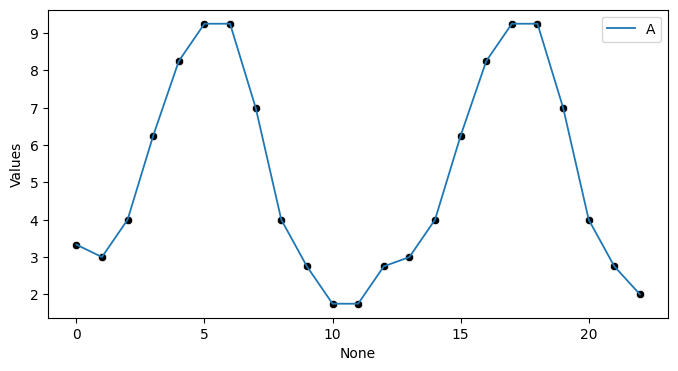

In [14]:
##### Plotting
# plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
sns.lineplot(x=df_ma_3.index, y=df_ma_3.Values, ax=axes, linestyle="-", linewidth=1.3, color="purple", hue=df_ma_3.Category)
sns.scatterplot(x=df_ma_3.index, y=df_ma_3.Values, ax=axes, color="black")
plt.show()

- `Find Peaks Based on Threshold`

In [15]:
# itertools.chain(df_ma_3.values.tolist())
print(df_ma_3.Values)

0     3.333333
1     3.000000
2     4.000000
3     6.250000
4     8.250000
5     9.250000
6     9.250000
7     7.000000
8     4.000000
9     2.750000
10    1.750000
11    1.750000
12    2.750000
13    3.000000
14    4.000000
15    6.250000
16    8.250000
17    9.250000
18    9.250000
19    7.000000
20    4.000000
21    2.750000
22    2.000000
Name: Values, dtype: float64


In [16]:
peaks = find_peaks(df_ma_3.Values, prominence=1)
threshold = 8
print(peaks)

(array([ 5, 17]), {'prominences': array([6.25, 7.25]), 'left_bases': array([ 1, 11]), 'right_bases': array([10, 22])})


In [17]:
df_ma_3.iloc[peaks[0],:]

,Values,Category
5,9.25,A
17,9.25,A


In [18]:
df_ma_3_peaks = df_ma_3.iloc[peaks[0],:].loc[df_ma_3.Values > threshold,:]

print(df_ma_3_peaks.head(5))

    Values Category
5     9.25        A
17    9.25        A


### `Min & Max Peak Values`

In [19]:
min_peak_value = round(df_ma_3_peaks.Values.min(), 2)
max_peak_value = round(df_ma_3_peaks.Values.min(), 2)

### `Var, STDEV, Mean`

In [20]:
region_variance = round(np.var(df_ma_3.Values), 2)
region_stddev = round(np.std(df_ma_3.Values), 2)
region_mean = round(np.mean(df_ma_3.Values), 2)

### `Data Points Based on Ranges`

In [21]:
no_of_data_points = df_ma_3.shape[0]
no_of_data_points_gt_8 = df_ma_3.loc[df_ma_3.Values>8,:].shape[0]

print("no_of_data_points : %s" %no_of_data_points)
print("no_of_data_points_gt_8 : %s" %no_of_data_points_gt_8)

no_of_data_points : 23
no_of_data_points_gt_8 : 6


### `No. of Peaks`

In [22]:
no_of_peaks_bn_8_10 = df_ma_3_peaks.loc[(df_ma_3_peaks.Values >=8) & (df_ma_3_peaks.Values < 10)].shape[0]

print(f"no_of_data_points : {no_of_peaks_bn_8_10}")

no_of_data_points : 2


In [23]:
trend_op = mk.original_test(df_ma_3.Values)
trend_op

Mann_Kendall_Test(trend='no trend', h=np.False_, p=np.float64(0.9150960216545208), z=np.float64(-0.10661297883234275), Tau=np.float64(-0.019762845849802372), s=np.float64(-5.0), var_s=np.float64(1407.6666666666667), slope=np.float64(0.0), intercept=np.float64(4.0))

In [24]:
df_timeseries_features = pd.DataFrame({"min_peak_value":[min_peak_value],
                                    "max_peak_value":[max_peak_value],
                                    "region_variance":[region_variance],
                                    "region_stddev":[region_stddev],
                                    "region_mean":[region_mean],
                                    "no_of_data_points":[no_of_data_points],
                                    "no_of_data_points_gt_8":[no_of_data_points_gt_8],
                                    "no_of_peaks_bn_8_10":[no_of_peaks_bn_8_10],
                                    "trend_op":[trend_op[0]]})

df_timeseries_features

,min_peak_value,max_peak_value,region_variance,region_stddev,region_mean,no_of_data_points,no_of_data_points_gt_8,no_of_peaks_bn_8_10,trend_op
0,9.25,9.25,7.12,2.67,5.18,23,6,2,no trend


<!--  -->

<!--  -->

### `Sample Data : Category[B]`

Length of data :  24
[1, 3, 6, 23, 3, 12, 14, 4, 5, 3, 2, 1, 1, 3, 24, 2, 5, 3, 14, 5, 5, 3, 7, 1]


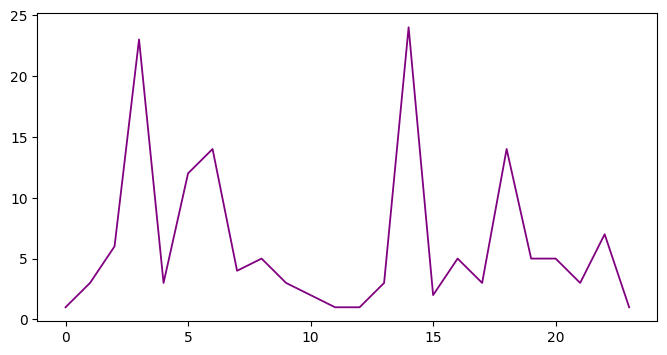

In [25]:
##### Sample Data 
data = pd.Series([1,3,6,23,3,12,14,4,5,3,2,1,
                1,3,24,2,5,3,14,5,5,3,7,1]
                )
print("Length of data : ", len(data))
print(data.tolist())

##### Plotting
# plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
data.plot(ax=axes, linestyle="-", linewidth=1.3, color="purple", label="Value")
# plt.legend()
plt.show()

In [26]:
# starttime = datetime.datetime.strptime("2022-01-01 00:00:00.123000", "%Y-%m-%d %H:%M:%S.%f")
# endtime = datetime.datetime.strptime("2022-01-06 00:00:00.123000", "%Y-%m-%d %H:%M:%S.%f")

starttime = datetime.datetime.strptime("2022-01-01", "%Y-%m-%d")
endtime = datetime.datetime.strptime("2022-01-06", "%Y-%m-%d")

time_diff = endtime - starttime 
print(f"Starttime : {starttime}")
print(f"Endtime : {endtime}")
print(f"Time Diff : {time_diff}")

# time_diff_secs = time_diff.seconds
time_diff_secs = int(time_diff.total_seconds())
print(f"Time Diff Secs : {time_diff_secs}")

# time_diff_milli_secs = time_diff_secs * 24
# datetime_list = [starttime + datetime.datetime.timedelta(milliseconds=1*x) for x in range(0, time_diff_milli_secs)]
# datetime_list = [starttime + datetime.timedelta(milliseconds=1*x) for x in range(0, 24)] # Sample data values
datetime_list = [starttime + datetime.timedelta(days=1*x) for x in range(0, 24)] # Sample data values
print("Datetime List : ")
print(datetime_list)

Starttime : 2022-01-01 00:00:00
Endtime : 2022-01-06 00:00:00
Time Diff : 5 days, 0:00:00
Time Diff Secs : 432000
Datetime List : 
[datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 1, 2, 0, 0), datetime.datetime(2022, 1, 3, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 5, 0, 0), datetime.datetime(2022, 1, 6, 0, 0), datetime.datetime(2022, 1, 7, 0, 0), datetime.datetime(2022, 1, 8, 0, 0), datetime.datetime(2022, 1, 9, 0, 0), datetime.datetime(2022, 1, 10, 0, 0), datetime.datetime(2022, 1, 11, 0, 0), datetime.datetime(2022, 1, 12, 0, 0), datetime.datetime(2022, 1, 13, 0, 0), datetime.datetime(2022, 1, 14, 0, 0), datetime.datetime(2022, 1, 15, 0, 0), datetime.datetime(2022, 1, 16, 0, 0), datetime.datetime(2022, 1, 17, 0, 0), datetime.datetime(2022, 1, 18, 0, 0), datetime.datetime(2022, 1, 19, 0, 0), datetime.datetime(2022, 1, 20, 0, 0), datetime.datetime(2022, 1, 21, 0, 0), datetime.datetime(2022, 1, 22, 0, 0), datetime.datetime(2022, 1, 23, 0, 0), dat

In [27]:
df = pd.DataFrame({"Datetime":datetime_list,
                    "Values":data
                    })
df.index = range(len(df))
df["ID"] = df.index
df["Category"] = "B"

print(df.info())
print(df.head(2))
print(df.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  24 non-null     datetime64[ns]
 1   Values    24 non-null     int64         
 2   ID        24 non-null     int64         
 3   Category  24 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 900.0+ bytes
None
    Datetime  Values  ID Category
0 2022-01-01       1   0        B
1 2022-01-02       3   1        B
     Datetime  Values  ID Category
22 2022-01-23       7  22        B
23 2022-01-24       1  23        B


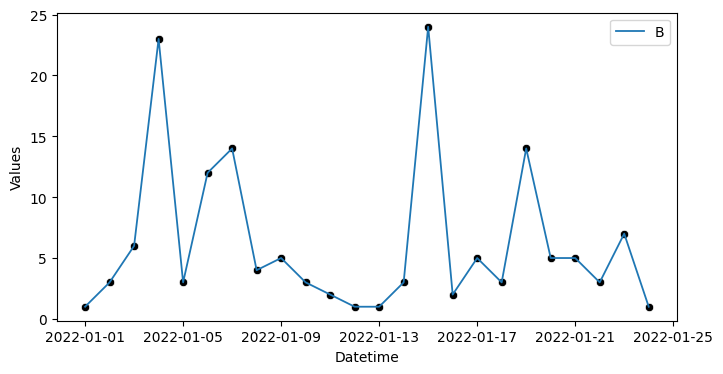

In [28]:
##### Plotting
# plt.style.use("seaborn-paper")
fig, axes = plt.subplots(1, 1, figsize=(8, 4), dpi=100)
# df.plot(x="Datetime", y="Values", 
#         ax=axes, linestyle="-", 
#         linewidth=1.3, color="purple"
#         )
sns.lineplot(x="Datetime", y="Values", data=df, ax=axes, linestyle="-", linewidth=1.3, color="purple", hue="Category")
sns.scatterplot(x="Datetime", y="Values", data=df, ax=axes, color="black")
# plt.legend()
plt.show()

- Observation
    - Repeat feature extraction process on timeseries category B
    - Like this each timeseries region becomes one row with features and with label
    - Then ML model trained on this as Timeseries classification  